## Summary
**To achieve leve-2 in "compare"**: 

Decision tree and SVM models (applied to classification of breast cancer severity diagnosis) were trained and optimized, and their performances were compared. For this purpose. after conducting data preparation and EDA on the dataset, samples were splitted to train and test sets. Grid search cross validation models were trained for each decision tree and SVM models and optimized paramets were found for them. Finally classification meterics were found for each modela and we compared models based on those metrics. As a result, SVM showed slightly better performance than decision tree in classification of breast cancer severity of patients. 

**To achieve level-2 in "cluster"**: 

Dataset was analyzed by k-means clustering method. We did not need optimize "k" since we already knew it is 2 because of number of classes in this dataset. Finally we calculated clustering metrics on the trained model and visualized the result of clustering in a plot. 

In assignment 9 I had used irrelevant metrics for clustering model, such as precision, recall, F1 and accuracy, however in this sumission I limited metrics to "silh" , "ARS" and "AMI". The reason those classification meterics do not work for clustering models is: By using them, we are indeed assuming that the clustering returns two distinct groups, and each of them should corresponds to our labels, which may not be the case. Actually cluster will have overlap in some extend.

## Description of Dataset
This dataset has 699 breast cancer samples. Each sample includes a code,  9 attributes and a target value as below.

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

This dataset was extracted from the UCI machine learning repository.Data has been gathered periodically between 1989 and 1991 in seveal groups.

[Reference](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)


## Loading Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection 
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

### Data Preparation

In [2]:
col_names = ['Sample_code', 'Clump_Thickness ', 'Uniformity_Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [3]:
df1 = pd.read_csv('data/breast_cancer_wisconsin.csv', names = col_names, index_col= 'Sample_code')

In [4]:
df1.head()

,Clump_Thickness,Uniformity_Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_code,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#dropping any rows with "?" parameter
df1 = df1[~(df1 == '?').any(axis=1)]

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [6]:
#convert class datatype from int to str
df1.Class= df1.Class.astype('str')

## EDA

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              683 non-null    int64 
 1   Uniformity_Cell_Size         683 non-null    int64 
 2   Cell_Shape                   683 non-null    int64 
 3   Marginal_Adhesion            683 non-null    int64 
 4   Single_Epithelial_Cell_Size  683 non-null    int64 
 5   Bare_Nuclei                  683 non-null    object
 6   Bland_Chromatin              683 non-null    int64 
 7   Normal_Nucleoli              683 non-null    int64 
 8   Mitoses                      683 non-null    int64 
 9   Class                        683 non-null    object
dtypes: int64(8), object(2)
memory usage: 58.7+ KB


In [8]:
df1.head()

,Clump_Thickness,Uniformity_Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_code,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
df1.shape

(683, 10)

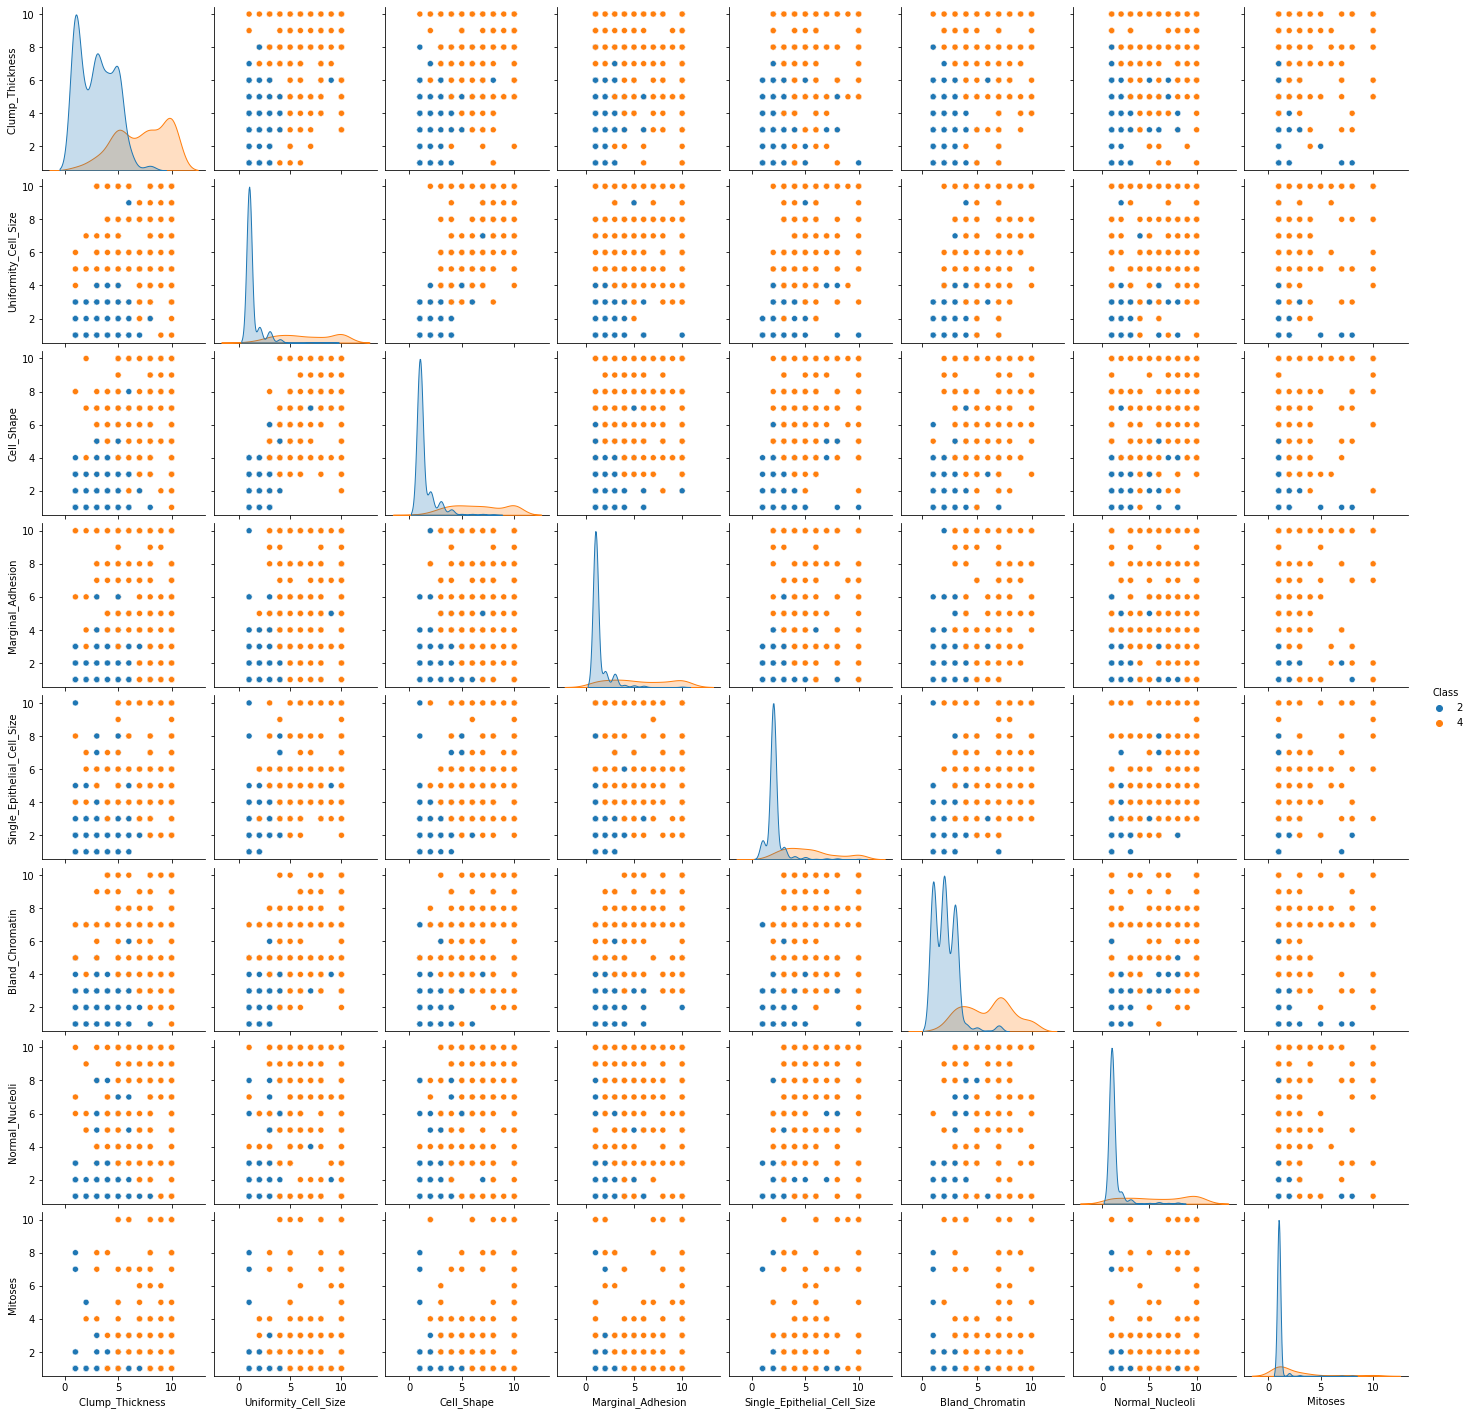

In [10]:
sns.pairplot(data =df1, hue='Class')

As we can see above datapoints are not seperated and dense, which is not a good point for accurate classification and/or clusttering. However since all these plots are 2-D, we may not be able to confidently judge about that only considering pairplots, We can understand further by conducting clusttering and then evaluating relevant metrics and get help from other visualizations (e.g. by comparing clusters with ground truth labels).

### Train and Test data

In [11]:
#numpy array of X and y data
X = df1.values[:, :9]
y = df1.values[:, 9]

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
            X , y,test_size =.2, random_state=0)

In [13]:
#shape of train data
X_train.shape

(546, 9)

In [14]:
#shape of test data
X_test.shape

(137, 9)

From 683 total samples, 546(80%)  assigned to train set, and 137 (20%) assigned to the test set.

### Classification - Decision Tree

In [15]:
#Instantiating decision tree model object
dt1 = tree.DecisionTreeClassifier(random_state=0)

In [16]:
#Selected prameters for grid search optimization on decision tree model
param_grid2 = {'min_samples_leaf' : [1,2,3,4,5], 'criterion' : ['entropy', 'gini'], 'min_samples_split': [1,2,3,4,5,6]}


In [17]:
#instantiating an object for GridSearchCV on dt1 model with specified param_grid
dt_opt2 = GridSearchCV(dt1,param_grid2)

In [18]:
#training GridSearchCV object (dt_opt)
dt_opt2.fit(X_train,y_train)

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

In [19]:
#results of GridSearchCV in the form of a dataframe
opt_df2 = pd.DataFrame(dt_opt2.cv_results_)
opt_df2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002376,0.000187,0.000000,0.000000,entropy,1,1,"{'criterion': 'entropy', 'min_samples_leaf': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
1,0.002026,0.000179,0.000684,0.000075,entropy,1,2,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.9,0.944954,0.944954,0.917431,0.93578,0.928624,0.017488,47
2,0.001910,0.000026,0.000628,0.000006,entropy,1,3,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.9,0.972477,0.944954,0.917431,0.93578,0.934128,0.024634,32
3,0.001887,0.000040,0.000624,0.000013,entropy,1,4,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.9,0.944954,0.954128,0.917431,0.93578,0.930459,0.019474,46
4,0.001863,0.000013,0.000610,0.000007,entropy,1,5,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.9,0.954128,0.954128,0.917431,0.93578,0.932294,0.021116,45


In [20]:
dt_opt2.score(X_test, y_test)

0.948905109489051

In [21]:
y_pred = dt_opt2.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



As we can see above all metrics (precision, recall and F1) are confirming a good performance of optimized decision tree model in classification of cancer severity.

In [23]:
df1['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

As we can see above, this is not a balanced dataset, but it did not have a considerable negative effect on the recall value.

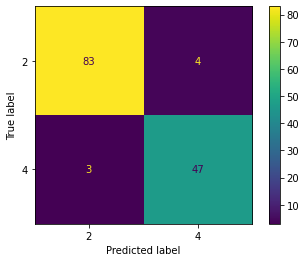

In [24]:
plot_confusion_matrix(dt_opt2,X_test, y_test )

AS we can see in the above confusion matrix, only 7 samples out of 137 samples could be classified accurately.

### Classification - SVM 

In [25]:
# Instantiate  classification Support Vector Classification
svm_clf2 = svm.SVC()

In [26]:
#gridsearch sets of parameters
param_grid_svm2 = {'kernel':['linear','rbf'], 'C':[.5, 1, 10]}

In [27]:
#instantiate the grid search object
svm_opt2 = GridSearchCV(svm_clf2,param_grid_svm2)

In [28]:
#Training the gridsearch with all sets of parameters.
svm_opt2.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1, 10], 'kernel': ['linear', 'rbf']})

In [29]:
#best prameters resulted from grid search CV
svm_opt2.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [30]:
#results of GridSearchCV in the form of a dataframe
opt_df_svm2 = pd.DataFrame(svm_opt2.cv_results_)
opt_df_svm2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004412,0.001302,0.000783,0.000050,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.954545,0.981651,0.972477,0.972477,0.972477,0.970726,0.008836,3
1,0.003307,0.000131,0.001001,0.000028,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.945455,0.981651,0.981651,0.972477,0.972477,0.970742,0.013293,1
2,0.004831,0.000764,0.000725,0.000009,1,linear,"{'C': 1, 'kernel': 'linear'}",0.954545,0.981651,0.972477,0.972477,0.972477,0.970726,0.008836,3
3,0.003140,0.000167,0.000959,0.000028,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.945455,0.981651,0.981651,0.972477,0.972477,0.970742,0.013293,1
4,0.021019,0.002731,0.000631,0.000081,10,linear,"{'C': 10, 'kernel': 'linear'}",0.954545,0.981651,0.972477,0.972477,0.972477,0.970726,0.008836,3
5,0.002446,0.000191,0.000652,0.000017,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.945455,0.963303,0.972477,0.963303,0.963303,0.961568,0.008805,6


Below we can see mean accuracy of prediction on the test data. This metric improved from 0.949 to 0.963 for decision tree and SVM, respectively. 

In [31]:
# Mean accuracy 
svm_opt2.score(X_test, y_test)

0.9635036496350365

Comparing decision tree model accuracy with SVM, we can see that accuracy improved from 94.9 to 96.3, respectively. 
Does it mean that SVM is a more relable model for classification task of this dataset? Let's do more evaluation by looking at more classification metrics.

In [32]:
#prediction on the test set
y_pred = svm_opt2.predict(X_test)

In [33]:
#classification metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        87
           4       0.92      0.98      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



Comparing classification metrics of SVM model with decision tree model, it could be noticed that all precision, recall and F1 have improved slightly which could potentially imply better performance of SVM for this daaset. But the different is so negligible. Let's evaluate more by looking at confusion matrix and classification confidence interval. 

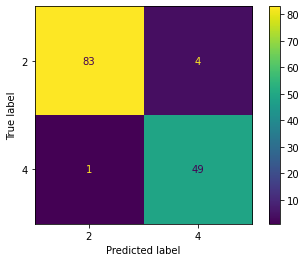

In [34]:
#Plot Confusion Matrix
plot_confusion_matrix(svm_opt2,X_test, y_test )

Comparing SVM confusion matrix with the deciion tree one, we can notice that number of inaccurate labels decreased from 7 to 5. Considering that alone, SVM was slightly more successful than desicion tree for this classification task, however again it is a very slight difference and could be result of chance, due to size of test dataset. Because when dataset is not big enough, chance of accidental results would increase as well.

### Classification Confidence Interval

Here we want to calculate classification confidence intervals( 95% confidence level) for the accuracy of both trained classification models. Then we can evaluate how different these two classification models are. Smaller confidence interval corresponds with a more precise estimate and a larger Confidence Interval corresponds with a less precise estimate. The larger our test dataset is the smaller interval will be and consequently will have a more accurate predicted accuracy. As shown before number of test samples in this analysis is 137 (20% of whole samples). Since this number is a descent number for a test dataset, we expect to achive a relatively small interval.

In [35]:
#Function for calculation of classification confidence with 95% confidence level
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    interval = 1.96*np.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [36]:
classification_confint(svm_opt2.score(X_test,y_test),len(y_test))

(0.9321023814237646, 0.9949049178463085)

The true classification accuracy of the model is likely between 93.2% and 99.5%.

In [37]:
classification_confint(dt_opt2.score(X_test,y_test),len(y_test))

(0.912033175570267, 0.9857770434078351)

The true classification accuracy of the model is likely between 91.2% and 98.6%.

Sinnce in one hand, the accuracy intervals of these two models have considerable overlap, and in the other hand accuracy and other metrics are very close, we can conculde that models are not considered different considering their performance in prediction of breast cancer severity. 

### Clustering 

Here we want to evaluate how clustering as an unsupervised learning method, could be successful in clastering (consequently classifying) samples to to severity levels of breast cancer.

Below we can see scatter plot of two selected attributes ("Cell_Shape" and "Uniformity_Cell_Size") before clusttering. Later we will plot this again to see clusters (predicted labels) after training clusttering model.

Text(0, 0.5, 'Uniformity_Cell_Size')

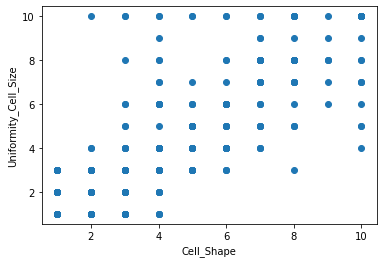

In [38]:
plt.scatter(df1['Cell_Shape'], df1['Uniformity_Cell_Size'])
plt.xlabel('Cell_Shape')
plt.ylabel('Uniformity_Cell_Size')

In [39]:
#instantiating kmeans clustering object with two clusters
km2 = KMeans(n_clusters=2, random_state=0)

In [40]:
#train kmeans model
km2.fit(X)

KMeans(n_clusters=2, random_state=0)

In [41]:
#Coordinates of cluster centers. 
centroids2 = km2.cluster_centers_
centroids2

array([[3.05518764, 1.29801325, 1.42825607, 1.35320088, 2.09492274,
        1.31788079, 2.09271523, 1.26048565, 1.11258278],
       [7.17391304, 6.8       , 6.73478261, 5.73913043, 5.47826087,
        7.93043478, 6.10869565, 6.03913043, 2.56956522]])

In [43]:
#changing class dtype to float
df1.Class= df1.Class.astype('float')

As we can see above each centroid has 10 elements which stand for 10 attributes/dimentioans. But when it comes to visualization, we are only able to show centroids in 2 or 3 dimentions. That is a reason why visualization alone could not be a perfect criteria to judge performance of model and metrics would be helpful for a more mature intuition and judgment on a clusttering model.

Now let's visually compare the predicted classes using kmeans and ground truth labels. Also we visualize the location of centroids in each cluster which were calculated previsuously using 'km.cluster_centers_'.

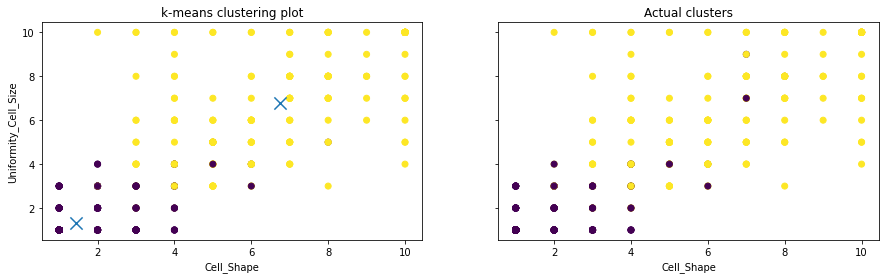

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4), sharey=True)
ax1.scatter(df1['Cell_Shape'], df1['Uniformity_Cell_Size'],c = km2.labels_)
ax2.scatter(df1['Cell_Shape'], df1['Uniformity_Cell_Size'],c = df1['Class'])
ax1.set_xlabel('Cell_Shape')
ax2.set_xlabel('Cell_Shape')
ax1.set_ylabel('Uniformity_Cell_Size')
ax1.set_title('k-means clustering plot')
ax2.set_title('Actual clusters')
#plotting centroids
ax1.scatter(centroids2[:, 2],centroids2[:, 1], marker = "x", s = 150)

As we can see above the centroid of purple cluster does not look at the center. It roots at he same reason we discussed before. This centroid is the arithmetic mean of the cluster which is in fact a 10-D shape, simplifed here in 2-D for two of attributes.

In [45]:
#mean Silhouette Coefficient on all 9 attributes for the model trained on 9 attributes
metrics.silhouette_score(df1.values[:, :9], km2.labels_)

0.5967981179111456

silhouette_score depends on both mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample (intra and inter similarity). The more dense and seperated clusters are, the higher silhouette_score will be (closer to 1). In this case silhouette_score = 0.597 is the result of some overlap between clusters and assigning incorrect cluster to some samples, as could be also confirmed by the above plots, as well. 

In [46]:
metrics.adjusted_rand_score(df1['Class'],km2.labels_)

0.8464675664733539

ARS is the measure of similarity between two clustering, then the relatively high value of ARS here confirms the similarity of predicted clusters (labels) to the ground truth labels. This result shows high number of samples were clustered (classified)correctly, and compatible with the ground truth labels. 

In [47]:
#Adjusted Mutual Information between two clusterings.
metrics.adjusted_mutual_info_score(df1['Class'],km2.labels_)

0.7475405677426025

AMI is correlation for categorical values. In the other words, how similar are predicted and ground truth labels for these points. In this case, AMI is 0.747 which is relatively high and shows similarity of predicted labels to ground truth labels. This actually is compatible with the other calculated metrics.
We could use AMI and ARS meterics just because we had ground truth labels for this dataset. In an unsupervised clustering we would not be able to judge based on these two metrics.